In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r"C:\Users\HP\Desktop\ASHFA\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

In [26]:
df_US = df_US.explode('job_skills')

In [27]:
df_US_top_pay = df_US.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by=['median'],ascending=False)
df_US_top_pay = df_US_top_pay.head(10)
df_US_top_pay

,median,count
job_skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


In [28]:
df_US_skills= df_US.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by=['count'],ascending=False)
df_US_skills = df_US_skills.head(10)
df_US_skills

,median,count
job_skills,,
sql,91000.00,2508
excel,84392.00,1808
python,97500.00,1431
tableau,92875.00,1364
sas,90000.00,926
r,92500.00,893
power bi,90000.00,838
powerpoint,85000.00,462
word,81194.75,461


In [42]:
df_US_skills = df_US_skills.head(10).sort_values(by=['median'],ascending=False)

<Axes: ylabel='job_skills'>

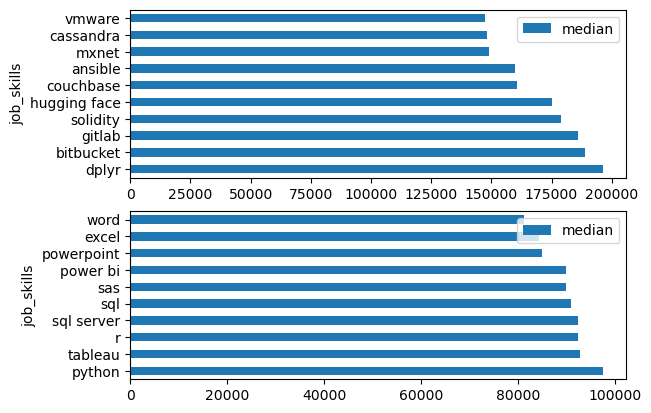

In [43]:
fig,ax = plt.subplots(2,1)

df_US_top_pay.plot(kind='barh' ,  y='median',ax = ax[0] )

df_US_skills.plot(kind='barh' , y='median', ax = ax[1])

# inverting

<Axes: ylabel='job_skills'>

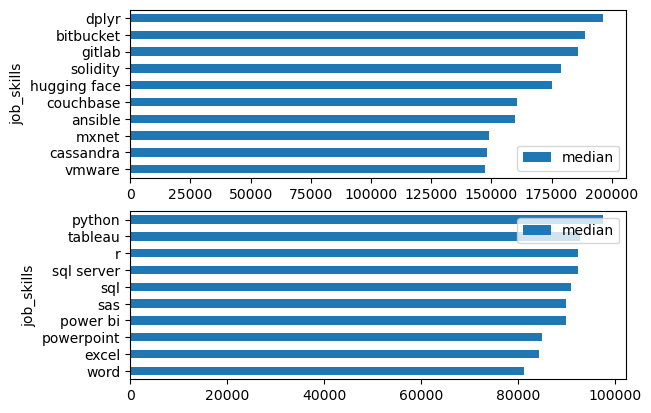

In [44]:
# ax[0].invert_yaxis() instead of doing this we can do 

fig,ax = plt.subplots(2,1)

df_US_top_pay[::-1].plot(kind='barh' ,  y='median',ax = ax[0] )

df_US_skills[::-1].plot(kind='barh' , y='median', ax = ax[1])

# plotting same x axis

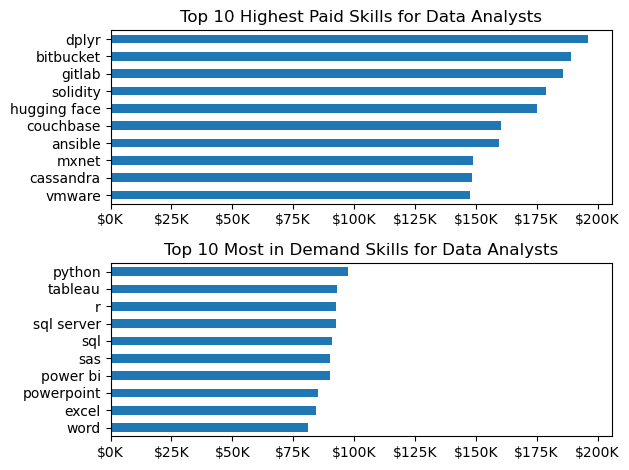

In [52]:
fig,ax = plt.subplots(2,1)

df_US_top_pay[::-1].plot(kind='barh' ,  y='median',ax = ax[0], legend=False )
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_US_skills[::-1].plot(kind='barh' , y='median', ax = ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysts')
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()